In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

In [2]:
alphabet = [chr(i) for i in range(97, 123)]

P(26, 2) = 26! / 24! = 26 * 25 = 650

In [3]:
cases = set([comb for comb in itertools.permutations(alphabet, 2)])

### Number of iterations to select every character for a single character

Let's say in a single iteration, we randomly select a character from our alphabet. The question we're answering here is: how many iterations do we need to randomly select every other character.

In a simplified example with an alphabet of ["a", "b", "c"] we would be looking at how many iterations it would take to select "b" and "c". We only care about the tuples (a, b) and (a, c), not (a,a).

95.3483
36
274


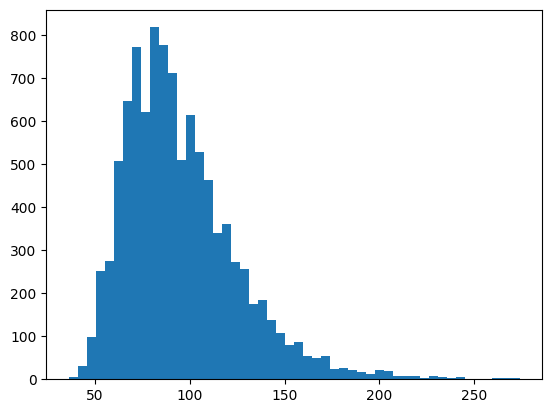

In [4]:
trials = 10000
results = []

for i in range(trials):

    visited = set()
    iterations = 0
    current = alphabet[0]
    choices = [letter for letter in alphabet if letter != current]

    while (len(visited) < len(choices)):
        iterations += 1
        choice = np.random.choice(choices)
        visited.add(choice)
        
    results.append(iterations)

print(sum(results) / len(results))
print(sorted(results)[0])
print(sorted(results)[-1])
plt.hist(results, bins=50)
plt.show()

### Number of Iterations for every character to be chosen at least once

In this case, a single iteration represents one random selection for every character in our alphabet. We want to see how many iterations it takes for every character to be selected at least once.

Let's go back to our simplified alphabet of ["a", "b", "c"].

In this case we have three random selections happening per iteration:

    "a": ["b", "c"]
    "b": ["a", "c"]
    "c": ["a", "b"]
    
We are simulating the number of trials we need to select "a", "b", and "c" at least once.

4.33305
2
19


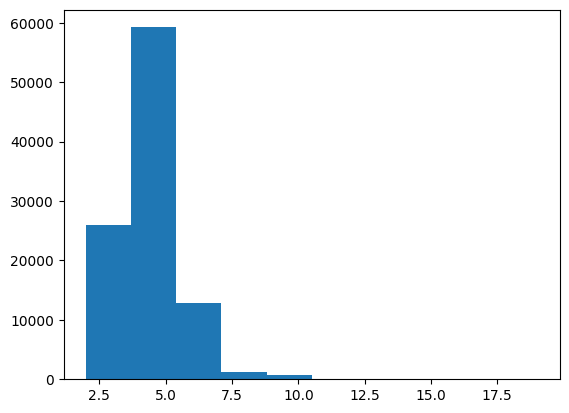

In [20]:
trials = 100000
results = []

for i in range(trials):

    iterations = 0
    counts = defaultdict(int)


    while len([value for value in counts.values() if value > 0]) < len(alphabet):

        for ch in alphabet:
            choices = [letter for letter in alphabet if letter != ch]
            choice = np.random.choice(choices)
            counts[choice] +=1

        iterations += 1
        
    results.append(iterations)

print(sum(results) / len(results))
print(sorted(results)[0])
print(sorted(results)[-1])
plt.hist(results, bins=10)
plt.show()